<a href="https://colab.research.google.com/github/vishalsingh1080/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Vishal_Singh_Hotel_Booking_EDA/Hotel_Bookings.csv')

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


#Univariate Analysis:

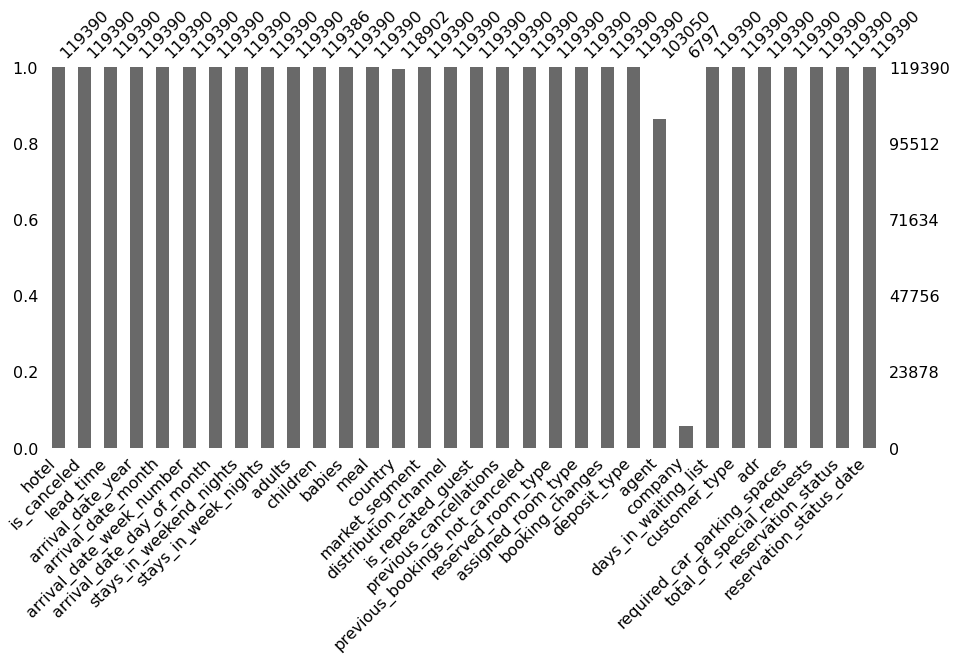

In [ ]:
#checking for missing values in dataframe
%matplotlib inline 
msno.bar(df,figsize=(15,7))

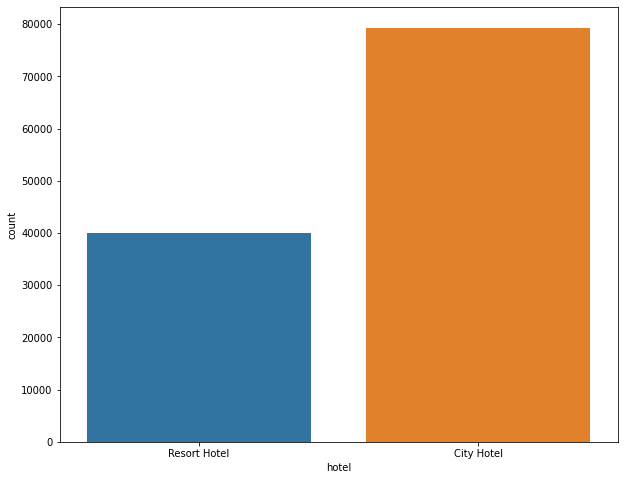

In [ ]:
# Distribution of the type of accomadation booked
plt.figure(figsize=(10, 8))
sns.countplot(x="hotel", data=df)
plt.show()

In the dataset, There are more reservations in city hotel in comparison to resorts

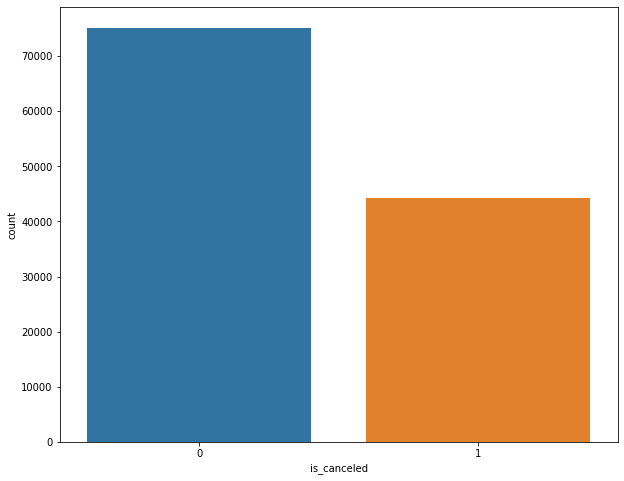

In [ ]:
# No. of bookings that were cancelled.
plt.figure(figsize=(10, 8))
sns.countplot(x="is_canceled", data=df,)
plt.show()

The total no. of bookings in the dataset is 119,390. The no. of bookings that were cancelled is more than 40,000 which is more than 34% of the total bookings

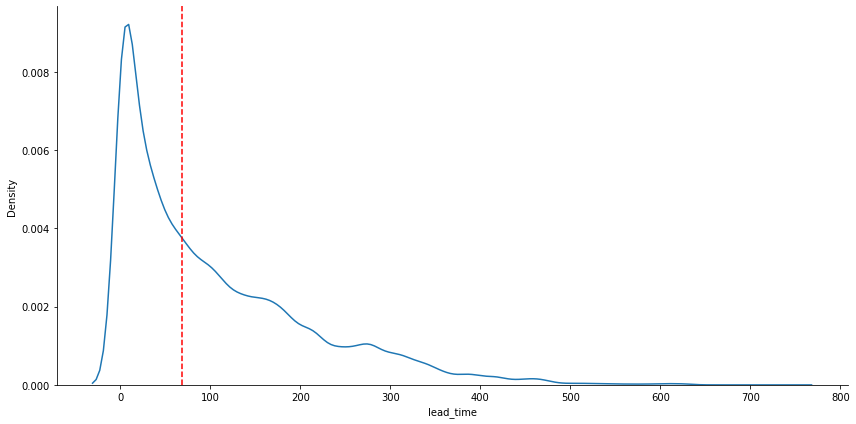

In [ ]:
# checking the distribution of lead_time which shows how much in advance a particular booking was made
ax = sns.displot(x="lead_time", kind="kde",data=df,height=6,aspect=2)
plt.axvline(np.median(df['lead_time']),color='r', linestyle='--')
plt.show()

The distribution of the lead_time is right skewed, with a median lead_time of about 70 days.This suggests that half of the bookings were made within 70 days while the rest were booked way in advance, with few of the bookings being more than 2 years. 

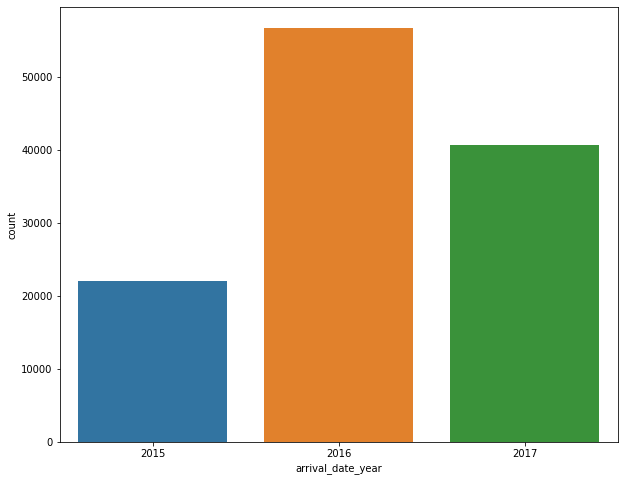

In [ ]:
# No of hotel bookings each year
plt.figure(figsize=(10, 8))
sns.countplot(x="arrival_date_year", data=df)
plt.show()

Most of the data in the dataset is from the year 2016, followed by 2017 & 2015.

In [ ]:
d = {'January':1, 'February':2, 'March':3, 'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12 }

df['month_year_no']= df['arrival_date_month'].map(d)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_year_no
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


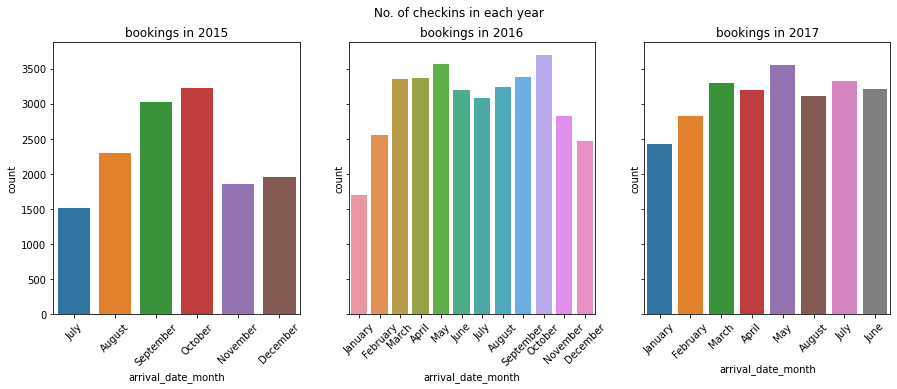

In [ ]:
df1 = df[df['is_canceled'] == 0]
grp = df1.groupby('arrival_date_year')
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('No. of checkins in each year')

# 2015
sns.countplot(ax=axes[0],data=grp.get_group(2015),x="arrival_date_month")
axes[0].set_title('bookings in 2015')

# 2016
sns.countplot(ax=axes[1],data=grp.get_group(2016),x="arrival_date_month")
axes[1].set_title('bookings in 2016')


# 2017
sns.countplot(ax=axes[2], data=grp.get_group(2017),x="arrival_date_month")
axes[2].set_title('bookings in 2017')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

From the above plots we can infer that the hotel booking data has been collected from july of 2015 till august of 2017. The hospitality industry seems fairly busy over this period, with customers checking in hotels throughtout the year. 

In [ ]:
def weekDay(year, month, day):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux // 4 - aux // 100 + (aux + 100) // 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return week[dayOfWeek]

In [ ]:
weekDay(2021, 6, 23)

'Wednesday'

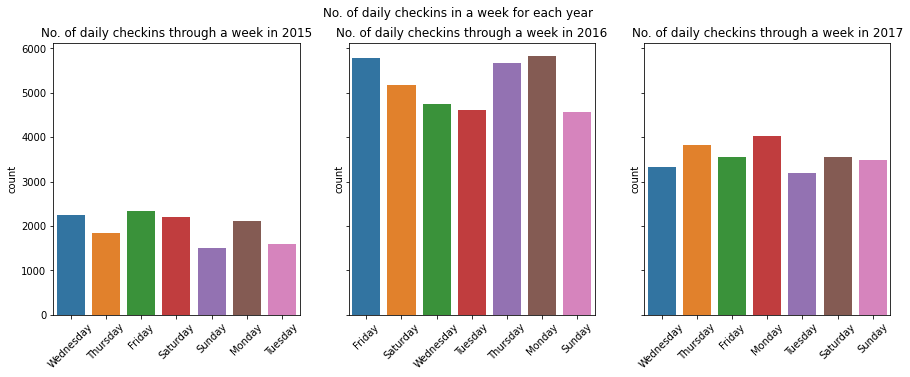

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('No. of daily checkins in a week for each year')

# 2015
wk_day_2015 = grp.get_group(2015).apply(lambda x: weekDay(x['arrival_date_year'],x['month_year_no'],x['arrival_date_day_of_month']), axis=1)
sns.countplot(ax=axes[0],x=wk_day_2015)
axes[0].set_title('No. of daily checkins through a week in 2015')

# 2016
wk_day_2016 = grp.get_group(2016).apply(lambda x: weekDay(x['arrival_date_year'],x['month_year_no'],x['arrival_date_day_of_month']), axis=1)
sns.countplot(ax=axes[1],x=wk_day_2016)
axes[1].set_title('No. of daily checkins through a week in 2016')

# 2017
wk_day_2017 = grp.get_group(2017).apply(lambda x: weekDay(x['arrival_date_year'],x['month_year_no'],x['arrival_date_day_of_month']), axis=1)
sns.countplot(ax=axes[2],x=wk_day_2017)
axes[2].set_title('No. of daily checkins through a week in 2017')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

The above plot illustrates the no. of checkins on a specific day of the week, throughout the year. It's quite evident that the number of checkins are higher as it comes closer to weekends, starting from thursday through saturday. Checkins on monday are quite high too, it could be because its the start of the business week and people have travelled to the destination to stay there during the weekdays and then return.

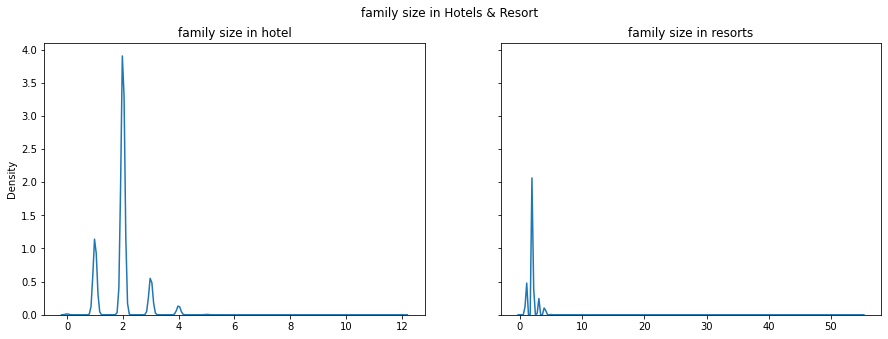

In [ ]:
# distribution of the size of the customer unit across establishments
def familysize(adults,children,babies):
    return adults+children+babies

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('family size in Hotels & Resort')
grp = df.groupby('hotel')
# Hotel
size_hotel = grp.get_group('City Hotel').apply(lambda x: familysize(x['adults'],x['children'],x['babies']), axis=1)
sns.kdeplot(x=size_hotel, ax=axes[0])
axes[0].set_title('family size in hotel')

# Resort
size_resort = grp.get_group('Resort Hotel').apply(lambda x: familysize(x['adults'],x['children'],x['babies']), axis=1)
sns.kdeplot(x=size_resort,ax=axes[1])
axes[1].set_title('family size in resorts')

plt.show()

The plot suggests that the family size in the two accomadation follows a multimodal distributions. This means there are different kind of customers at these establishments. In the case of hotels, singles, couples and families of sizes 3 & 4 are the ones to checkin frequently, with fews outliers also.Whereas in resorts, a similar pattern, in terms of family size, is observed but it also has quite a few big families with more than 10 members checking in as well, since resorts are generally bigger establishments than hotels.

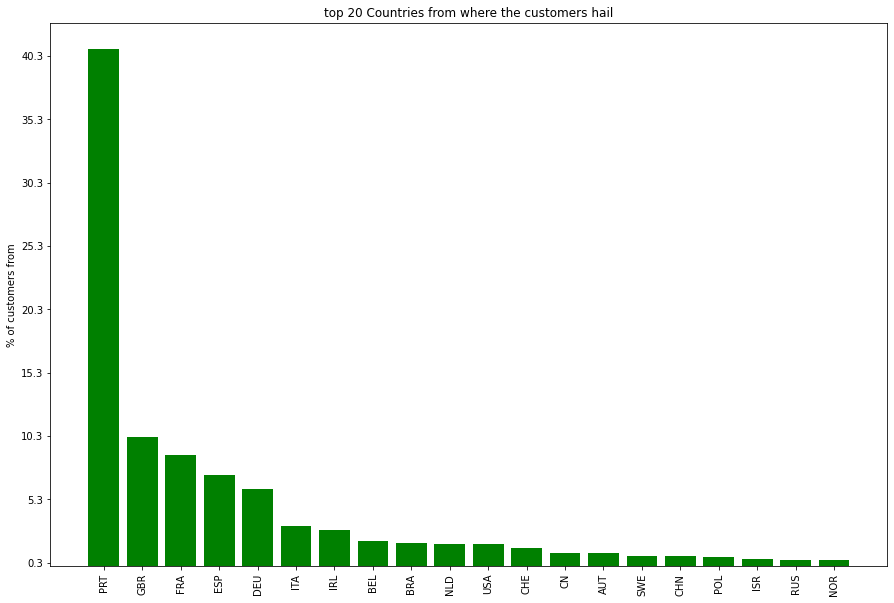

In [ ]:
# country
country_count = df.country.value_counts(normalize=True)
country_count = country_count * 100
country100 = country_count[country_count > 0.5]
plt.figure(figsize=(15,10))
height = country100.values
bars = country100.index
y_pos = np.arange(len(bars)) 
# Creating bars
plt.title('top 20 Countries from where the customers hail')
plt.bar(y_pos, height,color='green') 
# Creating names on the x-axis
plt.yticks(np.arange(0.3,45,5))
plt.ylabel('% of customers from')
plt.xticks(y_pos, bars,rotation=90)
plt.show()

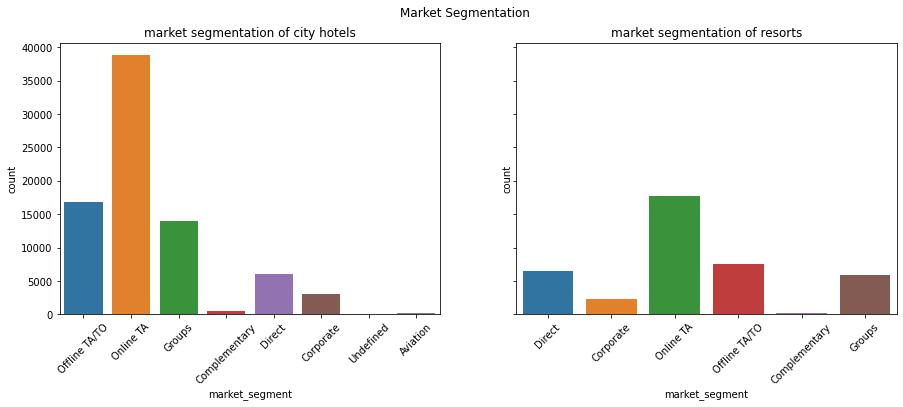

In [ ]:
# market segment
grp = df.groupby('hotel')
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Market Segmentation')

# Hotels
sns.countplot(ax=axes[0],data=grp.get_group('City Hotel'),x="market_segment")
axes[0].set_title('market segmentation of city hotels')

# Resorts
sns.countplot(ax=axes[1],data=grp.get_group('Resort Hotel'),x="market_segment")
axes[1].set_title('market segmentation of resorts')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

From the above plot we understand the different segments from which customers do bookings at resorts and hotels. Its quite clear, for both hotels & resorts, that the bulk of the bookings come from Travel agents,both offline & online.

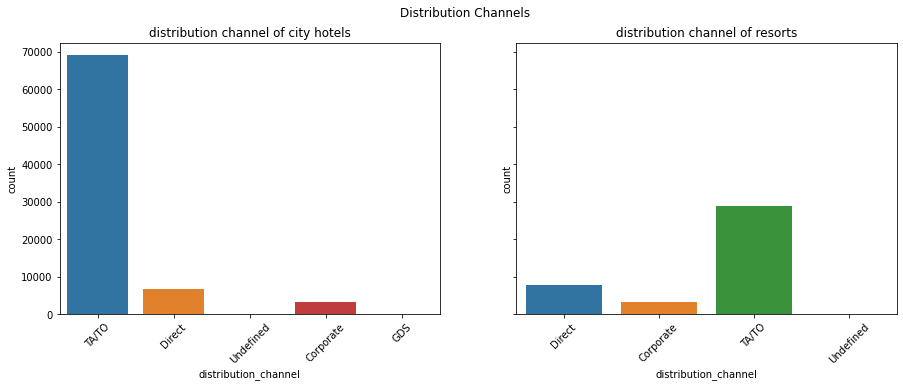

In [ ]:
# distribution channel
grp = df.groupby('hotel')
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution Channels')

# Hotels
sns.countplot(ax=axes[0],data=grp.get_group('City Hotel'), x="distribution_channel")
axes[0].set_title('distribution channel of city hotels')

# Resorts
sns.countplot(ax=axes[1],data=grp.get_group('Resort Hotel'), x="distribution_channel")
axes[1].set_title('distribution channel of resorts')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

The above plots shows from where resorts and hotels get their leads. Travel agents are the primary source for business. Hotels should reinvent themselves so that they can increase the no of leads from direct and corporate channels, so as to maximize their profits.

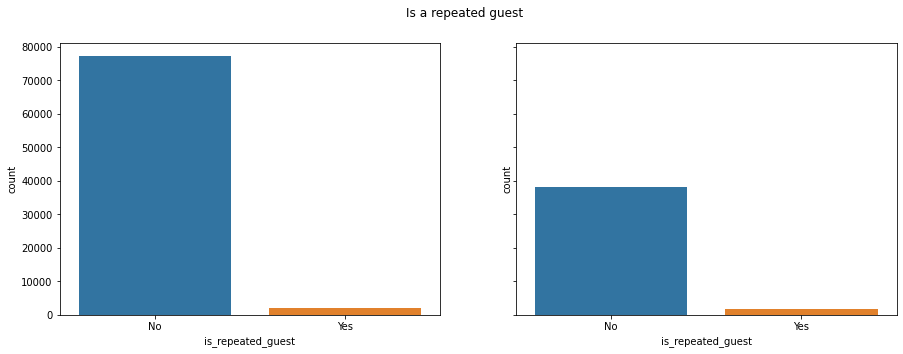

In [ ]:
# customer service satisfaction (is a repeated guest)
grp = df.groupby('hotel')
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Is a repeated guest')

# Hotels
sns.countplot(ax=axes[0],data=grp.get_group('City Hotel'), x="is_repeated_guest")
plt.sca(axes[0])
plt.xticks(range(2), ['No', 'Yes'])
# Resorts
sns.countplot(ax=axes[1],data=grp.get_group('Resort Hotel'), x="is_repeated_guest")
plt.sca(axes[1])
plt.xticks(range(2), ['No', 'Yes'])

plt.show()

From the above plot we can observe that both resorts and hotels aren't really doing a good job at retaining customers. Maybe the business can look into it and devise ways of attracting customers so that they visit again.

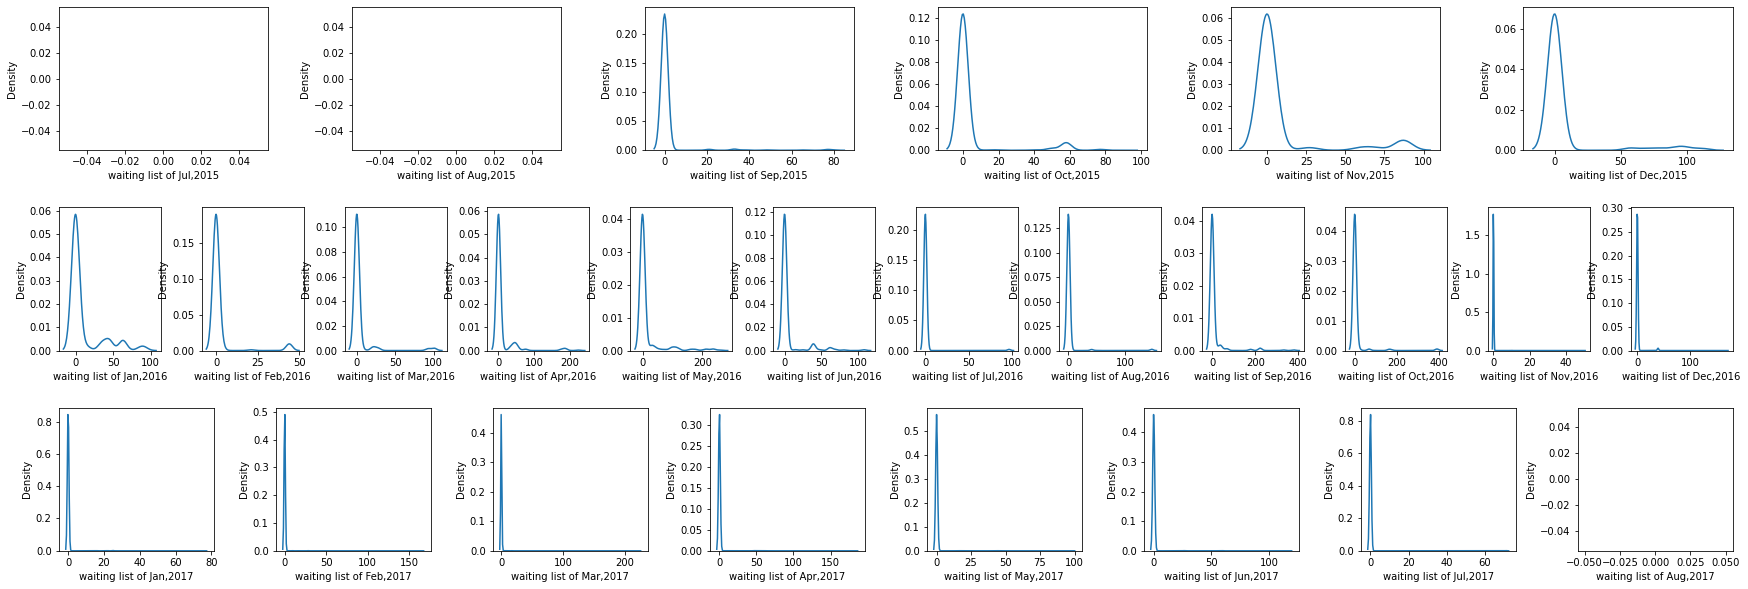

In [ ]:
# average wait time across months and year
grp = df.groupby('hotel')
hotel = grp.get_group('City Hotel').groupby('arrival_date_year')

hotel_2015 = hotel.get_group(2015)
hotel_2016 = hotel.get_group(2016)
hotel_2017 = hotel.get_group(2017)

hotels = [hotel_2015,hotel_2016,hotel_2017]
years = [2015,2016,2017]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig = plt.figure(figsize=(30, 10))
outer = gridspec.GridSpec(3, 1, wspace=0.4, hspace=0.4)

for i in range(3):
    l = len(hotels[i].month_year_no.unique())
    inner = gridspec.GridSpecFromSubplotSpec(1,l,subplot_spec=outer[i], wspace=0.4, hspace=0.2,)
    
    ind = min(hotels[i].month_year_no.unique())
    d = hotels[i].groupby('month_year_no')
    for j in range(l):
        ax = plt.Subplot(fig, inner[j])
        sns.kdeplot(ax=ax,x="days_in_waiting_list",data=d.get_group(ind))
        s = 'waiting list of ' + months[ind-1] + ',' + str(years[i]) 
        ax.set(xlabel=s)
        ind += 1
        
        #ax.set_xticks([])
        #ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()
plt.show()   

The above plot show the number of days a customer had to wait for his/her booking to get confirmed in City hotels, for the months in the respective years. It can be oberserved from the plots that in most cases the bookings were confirmed on the same day, with few outliers, who had to wait,anywhere from 50 to 200 days. Lets check the same for resorts! 

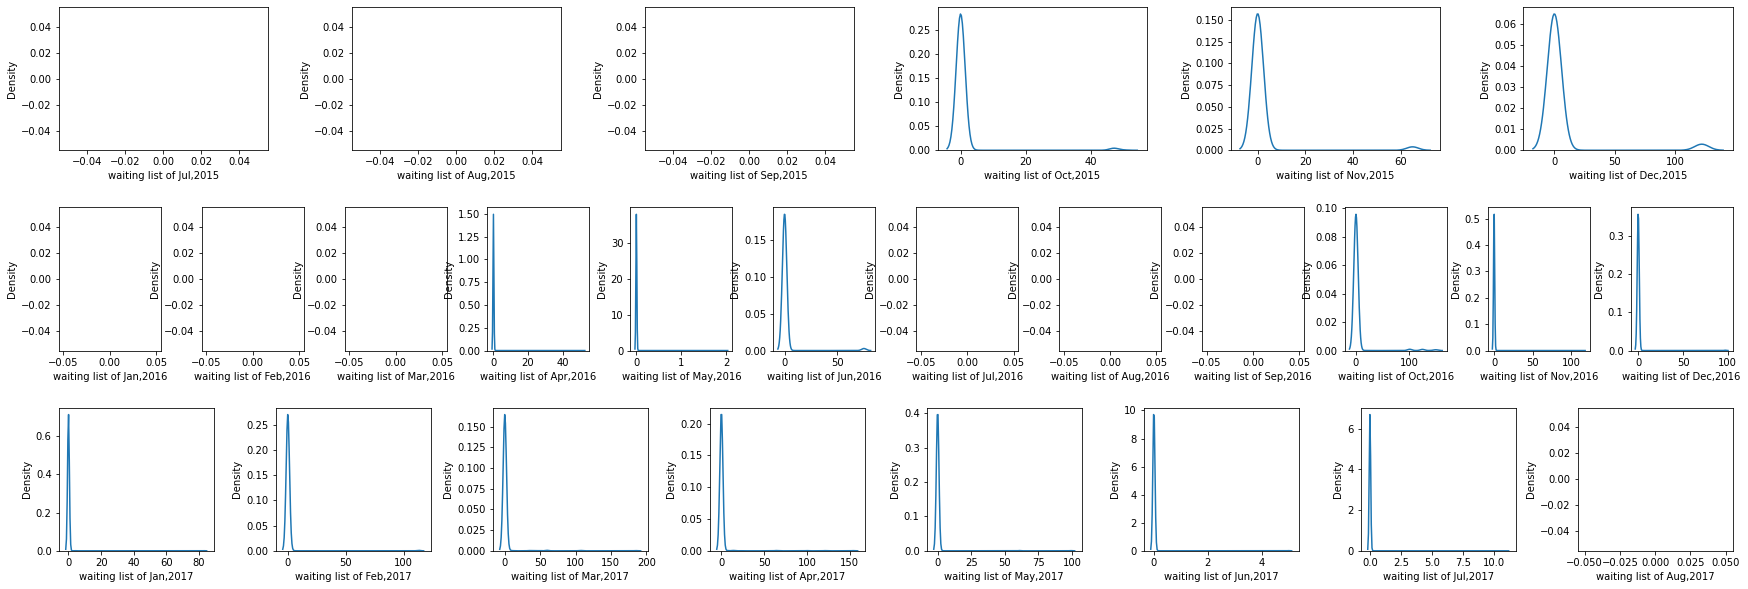

In [ ]:
# average wait time across months and year
grp = df.groupby('hotel')
resort = grp.get_group('Resort Hotel').groupby('arrival_date_year')

resort_2015 = resort.get_group(2015)
resort_2016 = resort.get_group(2016)
resort_2017 = resort.get_group(2017)

resorts = [resort_2015,resort_2016,resort_2017]
years = [2015,2016,2017]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig = plt.figure(figsize=(30, 10))
outer = gridspec.GridSpec(3, 1, wspace=0.4, hspace=0.4)

for i in range(3):
    l = len(resorts[i].month_year_no.unique())
    inner = gridspec.GridSpecFromSubplotSpec(1,l,subplot_spec=outer[i], wspace=0.4, hspace=0.2)
    
    ind = min(resorts[i].month_year_no.unique())
    d = resorts[i].groupby('month_year_no')
    for j in range(l):
        ax = plt.Subplot(fig, inner[j])
        sns.kdeplot(ax=ax,x="days_in_waiting_list",data=d.get_group(ind))
        s = 'waiting list of ' + months[ind-1] + ',' + str(years[i]) 
        ax.set(xlabel=s)
        ind += 1
        
        #ax.set_xticks([])
        #ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()
plt.show()   

# Bivariate Analysis:

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_year_no
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [ ]:
'''bivariate analysis'''

# adr vs reserved room type vs meal type
# room type booked vs market segment
# is canceled vs adr

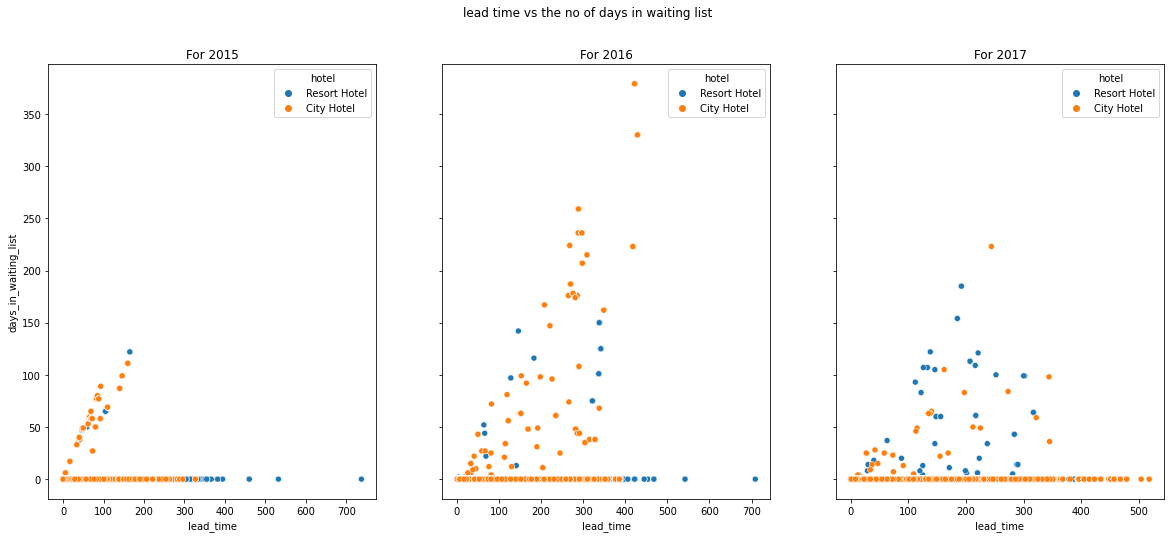

In [ ]:
# lead time vs wait time
df1 = df[df['is_canceled'] == 0]
grp = df1.groupby('arrival_date_year')
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('lead time vs the no of days in waiting list')

# 2015
sns.scatterplot(ax=axes[0],data=grp.get_group(2015),x="lead_time",y="days_in_waiting_list",hue="hotel")
axes[0].set_title('For 2015')

# 2016
sns.scatterplot(ax=axes[1],data=grp.get_group(2016),x="lead_time",y="days_in_waiting_list",hue="hotel")
axes[1].set_title('For 2016')


# 2017
sns.scatterplot(ax=axes[2],data=grp.get_group(2017),x="lead_time",y="days_in_waiting_list",hue="hotel")
axes[2].set_title('For 2017')
plt.show()

From the above plot we can infer that most of the bookings were confirmed the same day, for any given month, but some were in waiting list, maybe due to no availability and were only confirmed after a few days if any other booking got cancelled. Most of the cases of people in waiting list are of bookings made in city hotels.Resorts are less frequented and city hotels have much less rooms in comparison to resorts.

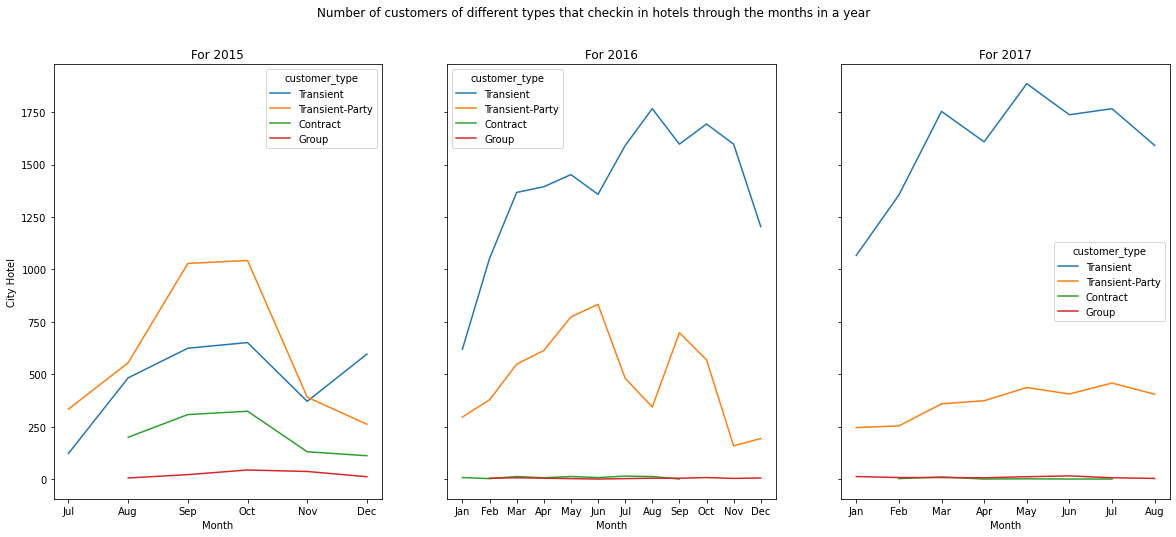

In [ ]:
# customer type vs time vs accom

df1 = df[df['is_canceled'] == 0]
grp = df1.groupby('hotel')

hotel = grp.get_group('City Hotel').groupby('arrival_date_year')

customer_hotel_2015 = hotel.get_group(2015).groupby(['month_year_no','customer_type']).count()
customer_hotel_2015.reset_index(inplace=True)

customer_hotel_2016 = hotel.get_group(2016).groupby(['month_year_no','customer_type']).count()
customer_hotel_2016.reset_index(inplace=True)

customer_hotel_2017 = hotel.get_group(2017).groupby(['month_year_no','customer_type']).count()
customer_hotel_2017.reset_index(inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Number of customers of different types that checkin in hotels through the months in a year')

sns.lineplot(x="month_year_no",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=customer_hotel_2015,ax=axes[0])
axes[0].set_title('For 2015')
plt.sca(axes[0])
plt.xticks(range(7,13), ['Jul','Aug','Sep','Oct','Nov','Dec'])
axes[0].set(xlabel='Month', ylabel='City Hotel')

sns.lineplot(x="month_year_no",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=customer_hotel_2016,ax=axes[1])
axes[1].set_title('For 2016')
plt.sca(axes[1])
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axes[1].set(xlabel='Month', ylabel='City Hotel')

sns.lineplot(x="month_year_no",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=customer_hotel_2017,ax=axes[2])
axes[2].set_title('For 2017')
plt.sca(axes[2])
plt.xticks(range(1,9), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
axes[2].set(xlabel='Month', ylabel='City Hotel')


plt.show()

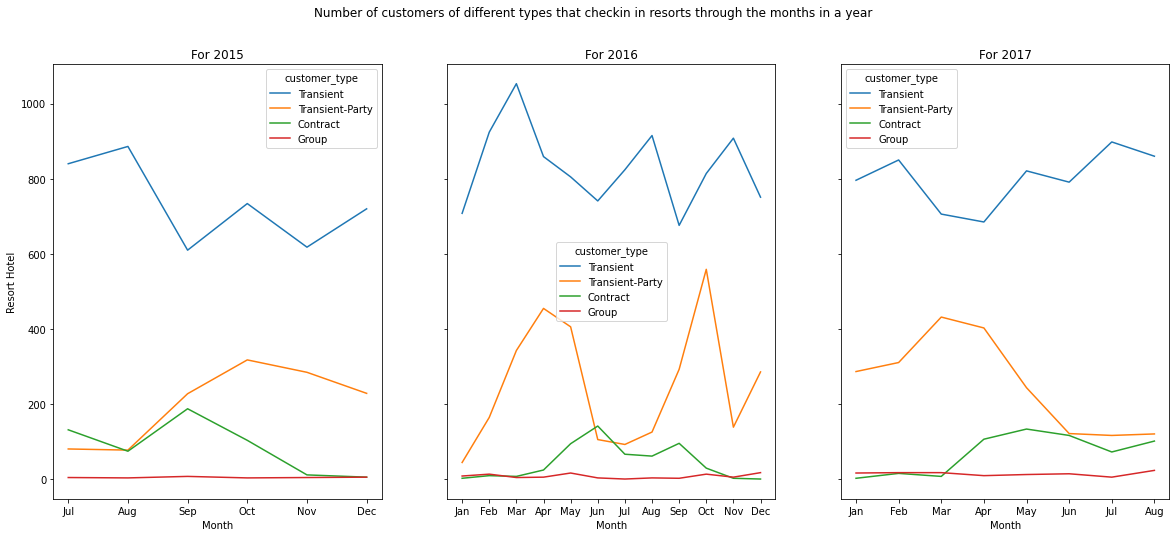

In [ ]:
resort = grp.get_group('Resort Hotel').groupby('arrival_date_year')

customer_resort_2015 = resort.get_group(2015).groupby(['month_year_no','customer_type']).count()
customer_resort_2015.reset_index(inplace=True)

customer_resort_2016 = resort.get_group(2016).groupby(['month_year_no','customer_type']).count()
customer_resort_2016.reset_index(inplace=True)

customer_resort_2017 = resort.get_group(2017).groupby(['month_year_no','customer_type']).count()
customer_resort_2017.reset_index(inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Number of customers of different types that checkin in resorts through the months in a year')

sns.lineplot(x="month_year_no",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=customer_resort_2015,ax=axes[0])
axes[0].set_title('For 2015')
plt.sca(axes[0])
plt.xticks(range(7,13), ['Jul','Aug','Sep','Oct','Nov','Dec'])
axes[0].set(xlabel='Month', ylabel='Resort Hotel')

sns.lineplot(x="month_year_no",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=customer_resort_2016,ax=axes[1])
axes[1].set_title('For 2016')
plt.sca(axes[1])
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axes[1].set(xlabel='Month', ylabel='Resort Hotel')

sns.lineplot(x="month_year_no",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=customer_resort_2017,ax=axes[2])
axes[2].set_title('For 2017')
plt.sca(axes[2])
plt.xticks(range(1,9), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
axes[2].set(xlabel='Month', ylabel='Resort Hotel')


plt.show()

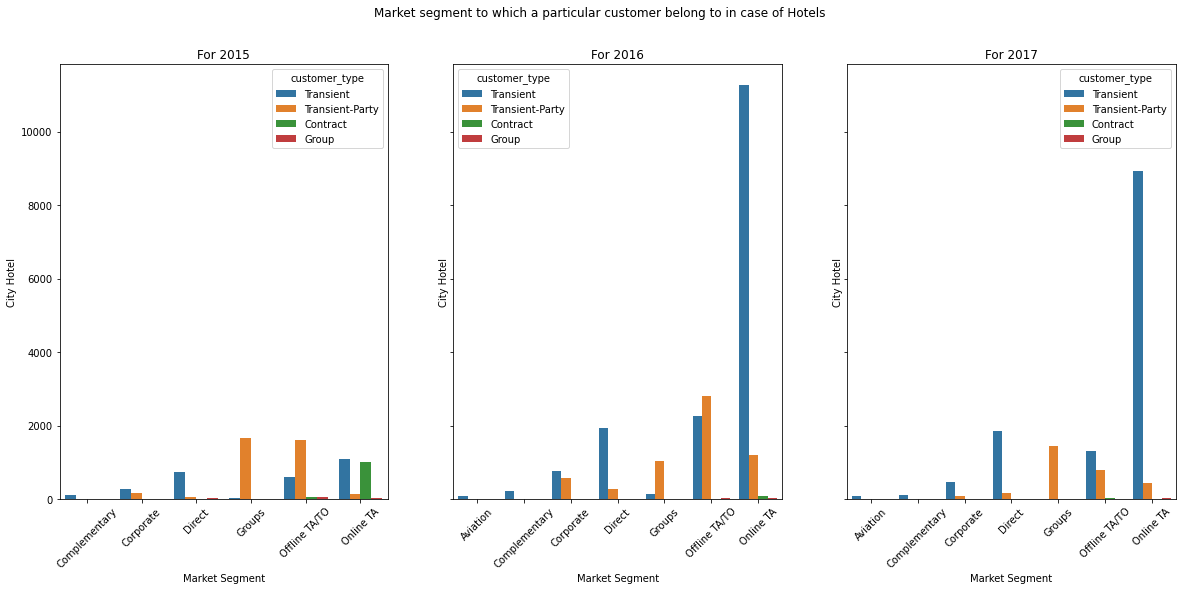

In [ ]:
# customer type vs market segment
df1 =  df[df['is_canceled']==0]
grp = df1.groupby('hotel')

hotel = grp.get_group('City Hotel').groupby('arrival_date_year')

hotel_market_2015 = hotel.get_group(2015).groupby(['market_segment','customer_type']).count()
hotel_market_2015.reset_index(inplace=True)

hotel_market_2016 = hotel.get_group(2016).groupby(['market_segment','customer_type']).count()
hotel_market_2016.reset_index(inplace=True)

hotel_market_2017 = hotel.get_group(2017).groupby(['market_segment','customer_type']).count()
hotel_market_2017.reset_index(inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Market segment to which a particular customer belong to in case of Hotels')

sns.barplot(x="market_segment",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=hotel_market_2015,ax=axes[0],)
axes[0].set_title('For 2015')
axes[0].set(xlabel='Market Segment', ylabel='City Hotel')

sns.barplot(x="market_segment",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=hotel_market_2016,ax=axes[1])
axes[1].set_title('For 2016')
axes[1].set(xlabel='Market Segment', ylabel='City Hotel')

sns.barplot(x="market_segment",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=hotel_market_2017,ax=axes[2])
axes[2].set_title('For 2017')
axes[2].set(xlabel='Market Segment', ylabel='City Hotel')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

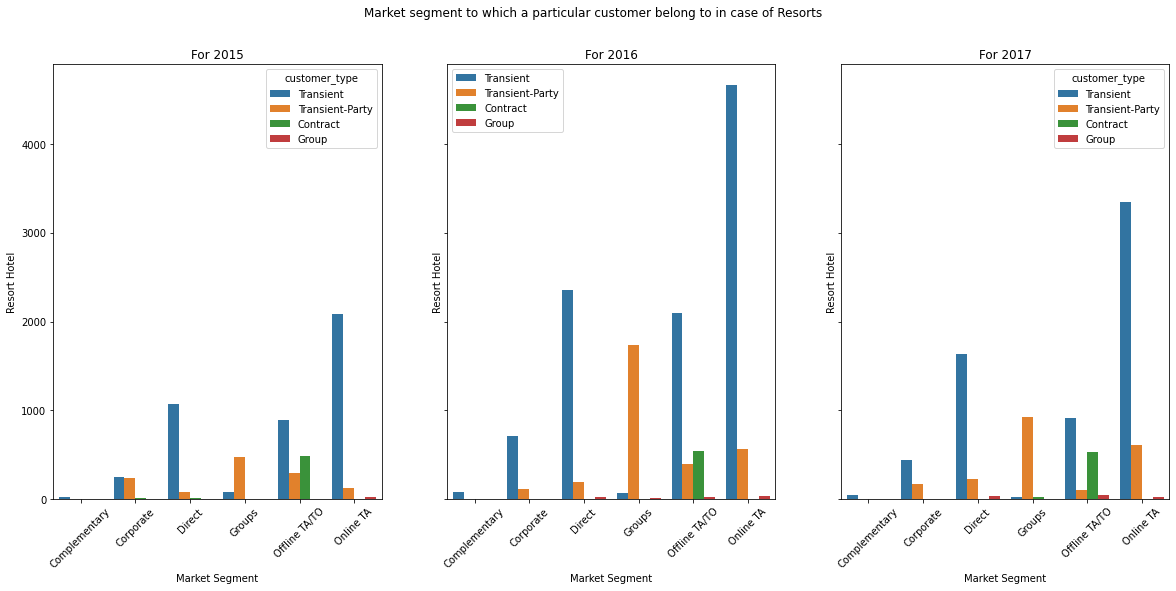

In [ ]:
resort = grp.get_group('Resort Hotel').groupby('arrival_date_year')

resort_market_2015 = resort.get_group(2015).groupby(['market_segment','customer_type']).count()
resort_market_2015.reset_index(inplace=True)

resort_market_2016 = resort.get_group(2016).groupby(['market_segment','customer_type']).count()
resort_market_2016.reset_index(inplace=True)

resort_market_2017 = resort.get_group(2017).groupby(['market_segment','customer_type']).count()
resort_market_2017.reset_index(inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Market segment to which a particular customer belong to in case of Resorts')

sns.barplot(x="market_segment",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=resort_market_2015,ax=axes[0],)
axes[0].set_title('For 2015')
axes[0].set(xlabel='Market Segment', ylabel='Resort Hotel')

sns.barplot(x="market_segment",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=resort_market_2016,ax=axes[1])
axes[1].set_title('For 2016')
axes[1].set(xlabel='Market Segment', ylabel='Resort Hotel')
axes[1].legend(loc='upper left')

sns.barplot(x="market_segment",y="hotel",hue="customer_type",hue_order=['Transient','Transient-Party','Contract','Group'],data=resort_market_2017,ax=axes[2])
axes[2].set_title('For 2017')
axes[2].set(xlabel='Market Segment', ylabel='Resort Hotel')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

In [ ]:
# adr in week,month,year
copy_df = df.copy()
copy_df['day_name'] = copy_df.apply(lambda x: weekDay(x['arrival_date_year'],x['month_year_no'],x['arrival_date_day_of_month']), axis=1)
copy_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_year_no,day_name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,Wednesday


In [ ]:
df1 = copy_df[copy_df['is_canceled']==0]
grp = df1.groupby('hotel')

hotel = grp.get_group('City Hotel').groupby('arrival_date_year')
resort = grp.get_group('Resort Hotel').groupby('arrival_date_year')

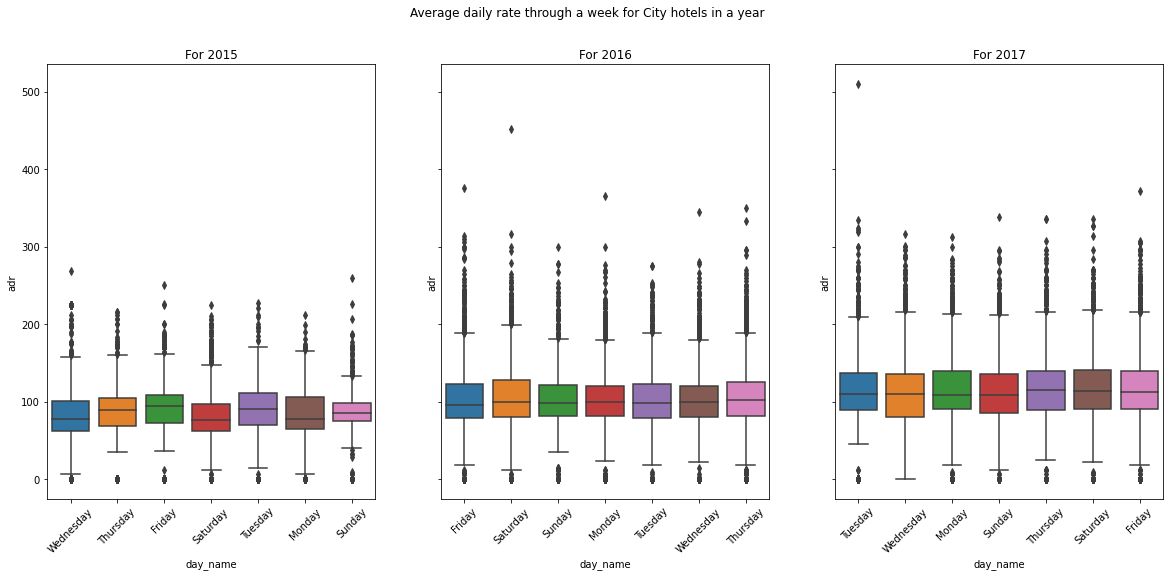

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Average daily rate through a week for City hotels in a year')

sns.boxplot(ax=axes[0],x='day_name',y='adr',data=hotel.get_group(2015))
axes[0].set_title('For 2015')

sns.boxplot(ax=axes[1],x='day_name',y='adr',data=hotel.get_group(2016))
axes[1].set_title('For 2016')

sns.boxplot(ax=axes[2],x='day_name',y='adr',data=hotel.get_group(2017))
axes[2].set_title('For 2017')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

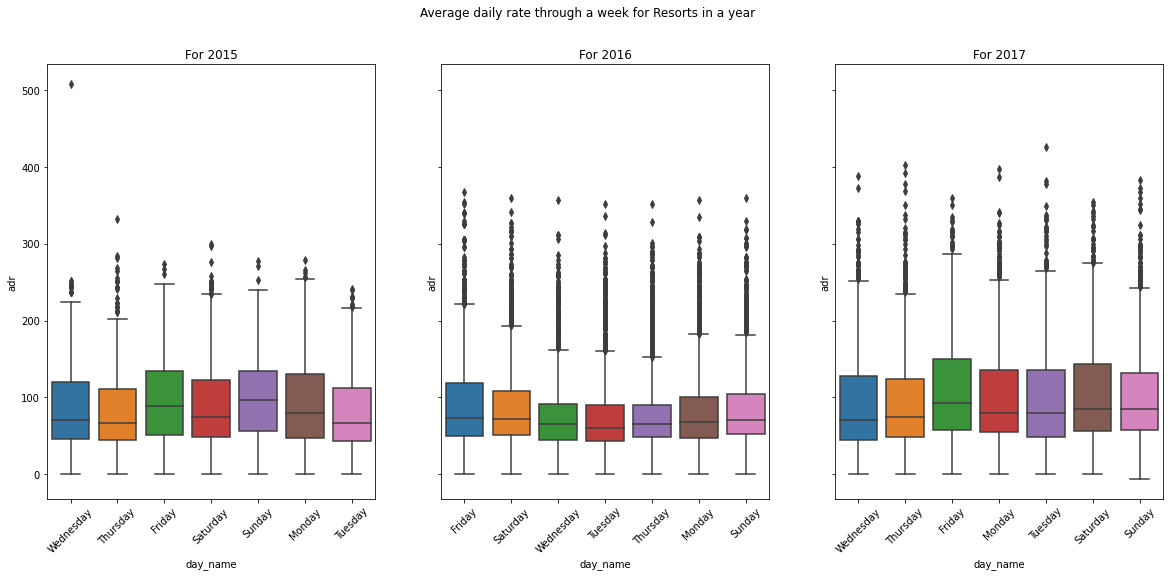

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Average daily rate through a week for Resorts in a year')

sns.boxplot(ax=axes[0],x='day_name',y='adr',data=resort.get_group(2015))
axes[0].set_title('For 2015')

sns.boxplot(ax=axes[1],x='day_name',y='adr',data=resort.get_group(2016))
axes[1].set_title('For 2016')

sns.boxplot(ax=axes[2],x='day_name',y='adr',data=resort.get_group(2017))
axes[2].set_title('For 2017')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

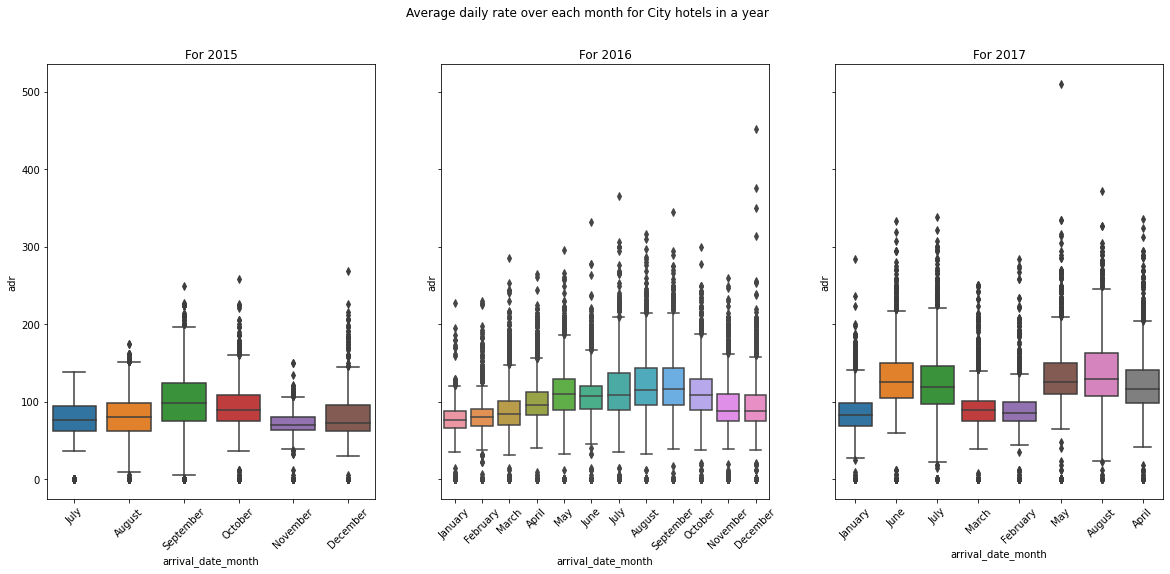

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Average daily rate over each month for City hotels in a year')

sns.boxplot(ax=axes[0],x='arrival_date_month',y='adr',data=hotel.get_group(2015))
axes[0].set_title('For 2015')

sns.boxplot(ax=axes[1],x='arrival_date_month',y='adr',data=hotel.get_group(2016))
axes[1].set_title('For 2016')

sns.boxplot(ax=axes[2],x='arrival_date_month',y='adr',data=hotel.get_group(2017))
axes[2].set_title('For 2017')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

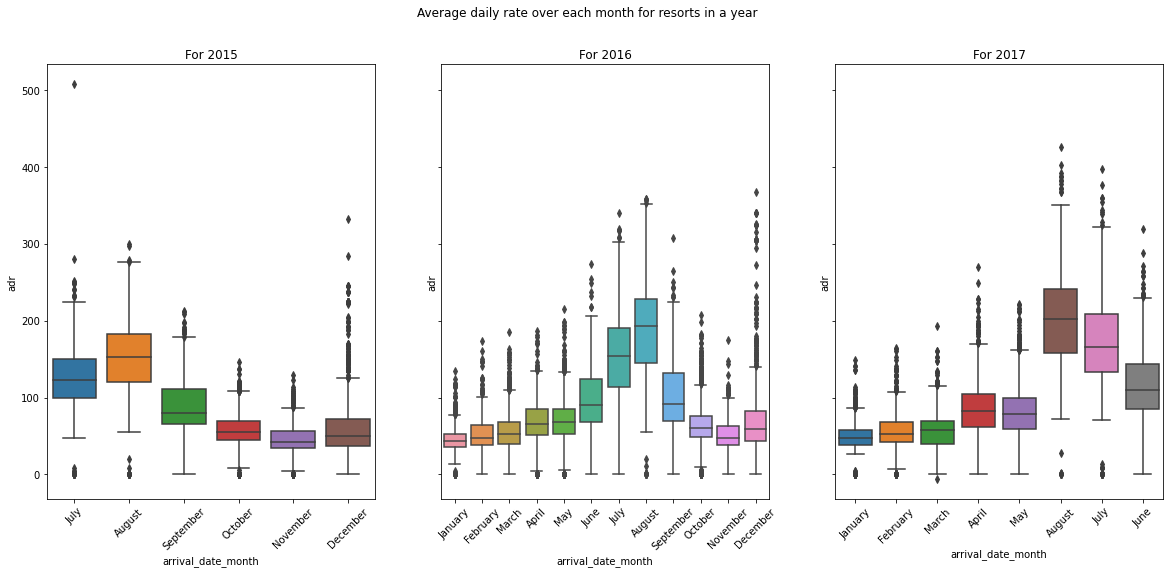

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Average daily rate over each month for resorts in a year')

sns.boxplot(ax=axes[0],x='arrival_date_month',y='adr',data=resort.get_group(2015))
axes[0].set_title('For 2015')

sns.boxplot(ax=axes[1],x='arrival_date_month',y='adr',data=resort.get_group(2016))
axes[1].set_title('For 2016')

sns.boxplot(ax=axes[2],x='arrival_date_month',y='adr',data=resort.get_group(2017))
axes[2].set_title('For 2017')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()